Plotting the centroid points: 
[[0.59483453 0.68386379 0.71876183]
 [0.25540544 0.34153667 0.37136652]
 [0.39413946 0.18294246 0.2393316 ]] 

0 : ( comparing classes 0 , 1 )
centroid for class 0: [0.59483453 0.68386379 0.71876183]
centroid for class 1: [0.25540544 0.34153667 0.37136652]
midpoint of classes (0, 1): [0.42511999 0.51270023 0.54506418] 

1 : ( comparing classes 0 , 2 )
centroid for class 0: [0.59483453 0.68386379 0.71876183]
centroid for class 2: [0.39413946 0.18294246 0.2393316 ]
midpoint of classes (0, 2): [0.494487   0.43340313 0.47904672] 

2 : ( comparing classes 1 , 2 )
centroid for class 1: [0.25540544 0.34153667 0.37136652]
centroid for class 2: [0.39413946 0.18294246 0.2393316 ]
midpoint of classes (1, 2): [0.32477245 0.26223957 0.30534906] 

{0: array([0.59483453, 0.68386379, 0.71876183]),
 1: array([0.25540544, 0.34153667, 0.37136652]),
 2: array([0.39413946, 0.18294246, 0.2393316 ])}



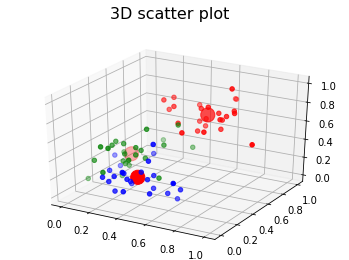

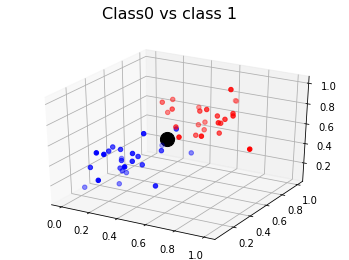

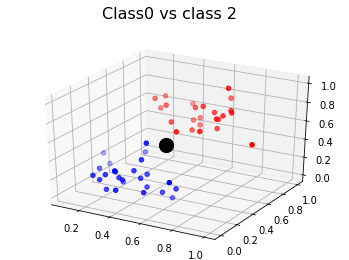

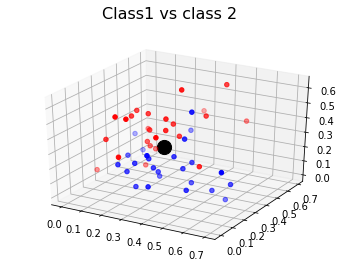

"\n        midpoint_dict_class_a_b = dict()\n        for class_num in range(0, num_classes):\n            print('finding midpoints between classes for class ', class_num)\n            print('centroid for class', class_num, ':', centroid_dict_by_class[class_num])\n            for feature_num in range(0, num_features):\n                print('centroid_dict_by_class[class_num][feature_num]:', centroid_dict_by_class[class_num][feature_num])\n"

In [3]:
import itertools as it
from pprint import pprint
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def run_train_test(training_input, testing_input):
    """
    Implement the training and testing procedure here. You are permitted
    to use additional functions but DO NOT change this function definition. 
    You are permitted to use the numpy library but you must write 
    your own code for the linear classifier. 

    Inputs:
        training_input: list form of the training file
            e.g. [[3, 5, 5, 5],[.3, .1, .4],[.3, .2, .1]...]
        testing_input: list form of the testing file

    Output:
        Dictionary of result values 

        IMPORTANT: YOU MUST USE THE SAME DICTIONARY KEYS SPECIFIED
        
        Example:
            return {
                "tpr": #your_true_positive_rate,
                "fpr": #your_false_positive_rate,
                "error_rate": #your_error_rate,
                "accuracy": #your_accuracy,
                "precision": #your_precision
            }
    """

    # TODO: IMPLEMENT
    pass


class linear_classifier:
    num_features = None
    num_classes = None
    fig = None
    ax = None

    def __init__(self, trainFile, testFile):
        self.colors = ['red', 'green', 'blue']
        self.x_train, self.y_train = self.preprocess_file(trainFile)
        self.x_test, self.y_test = self.preprocess_file(testFile)
        self.process_data(self.x_train, self.y_train)
        run_train_test(self.x_train, self.y_train)

    def preprocess_file(self, filename):
        with open(filename, "r") as f:
            data = [[float(y) for y in x.strip().split(" ")] for x in f]
            data[0] = [int(x) for x in data[0]]

        if self.num_features is None:
            self.num_features = int(len(data[0]) - 1)
        if self.num_classes is None:
            self.num_classes = int(data[0][0])

        samples, labels = self.remove_header_and_get_labels(data)
        samples = self.normalize_by_features(samples)

        return samples, labels

    def process_data(self, samples, labels):
        self.fig = plt.figure(0)
        self.ax = plt.axes(projection='3d')
        self.fig.suptitle('3D scatter plot', fontsize=16)
        self.ax.scatter3D(samples[:, 0], samples[:, 1], samples[:, 2],
                          c=labels[:],
                          cmap=matplotlib.colors.ListedColormap(self.colors))

        m = self.convert_to_matrix(samples, labels)
        centroid_points = np.empty(shape=(self.num_classes, self.num_features))


        samples_from_class = list()

        # get the centroid points
        for i in range(0, self.num_classes):
            samples_from_class_i = self.select_samples_from_class(m, label=i)
            samples_from_class.append(samples_from_class_i)
            centroid_class_i = self.get_centroid_of_class(samples_from_class_i)
            centroid_points[i] = centroid_class_i

        samples_from_class = np.asarray(samples_from_class, dtype=float)

        print('Plotting the centroid points: ')
        print(centroid_points, '\n')
        self.ax.scatter3D(centroid_points[:, 0], centroid_points[:, 1], centroid_points[:, 2], s=200, c='Red')

        centroid_dict_by_class = dict()
        for class_num in range(0, self.num_classes):
            centroid_dict_by_class[class_num] = centroid_points[class_num]

        all_class_pairs = it.combinations(centroid_dict_by_class.keys(), 2)

        for index, (class_label_a, class_label_b) in enumerate(all_class_pairs):
            class_a_samples = samples_from_class[class_label_a]
            class_b_samples = samples_from_class[class_label_b]
            # class_b_samples = select_samples_from_class(samples, class_label_b, num_features)

            self.fig = plt.figure(index + 1)
            self.ax = plt.axes(projection='3d')
            self.fig.suptitle('Class' + str(class_label_a) + ' vs class ' + str(class_label_b), fontsize=16)
            self.ax.scatter3D(class_a_samples[:, 0], class_a_samples[:, 1], class_a_samples[:, 2], c='Red')
            self.ax.scatter3D(class_b_samples[:, 0], class_b_samples[:, 1], class_b_samples[:, 2], c='Blue')

            a = np.asarray(centroid_dict_by_class[class_label_a], dtype=float)
            b = np.asarray(centroid_dict_by_class[class_label_b], dtype=float)
            print(index, ': ( comparing classes', class_label_a, ',', class_label_b, ')')
            print('centroid for class ' + str(class_label_a) + ': ' + str(a))
            print('centroid for class ' + str(class_label_b) + ': ' + str(b))

            mid_a_b = np.add(a, b) / 2.
            print('midpoint of classes (' + str(class_label_a) + ', ' + str(class_label_b) + '):', mid_a_b, '\n')
            self.ax.scatter3D(mid_a_b[0], mid_a_b[1], mid_a_b[2], s=200, c='Black')

            """
            for feature_num in range(0, self.num_features):
                # self.hyperplane_from_points([a, b], self.num_features)
                # num_centroids = num_classes
                # coords_per_centroid = num_features
                
                #mid_a_b = np.add(a, b) / 2.
                #print('midpoint: ', mid_a_b)
                works but best?
                mid_a_b = np.add(centroid_dict_by_class[class_label_a][feature_num],
                                 centroid_dict_by_class[class_label_b][feature_num]) / 2.0
                print('    midpoint between classes ' + str(class_label_a),
                      ' and ' + str(class_label_b) + ' for feature ' + str(feature_num) + ' =\n   ',
                      centroid_dict_by_class[class_label_a][feature_num], '+',
                      centroid_dict_by_class[class_label_b][feature_num], ' * 0.5 = ', mid_a_b)
            print()
            """

        pprint(centroid_dict_by_class)
        print()
        plt.show()

    def hyperplane_from_points(self, points):
        # print('centroid points: \n', points)
        print('matrix: \n', np.matrix())
        point = np.ones((self.num_features - 1, 1))
        a = np.dot(np.linalg.inv(points), point)
        print(a)

    def normalize_by_features(self, samples):
        """
            Args:
                samples: np array of shape (NUM_SAMPLES, NUM_FEATURES)
            Returns:
                m: np array of shape (NUM_SAMPLES, NUM_FEATURES)
            """
        for col in range(self.num_features):
            samples[:, col] = (samples[:, col] - np.min(samples[:, col])) / (
                    np.max(samples[:, col]) - np.min(samples[:, col]))
        return samples

    def select_samples_from_class(self, m_in, label):
        """
        Args:
            label: label value of the class to select samples for
            m_in: matrix of samples with labels as final column
        Returns:
            m_out: matrix of samples where label matches, discarding the label value
        """
        return m_in[m_in[:, self.num_features] == float(label), :-1]

    @staticmethod
    def get_centroid_of_class(m_in):
        """
        Args:
            m_in: np array of shape (NUM_MATCHING_SAMPLES, NUM_FEATURES)
                representing samples of a class
        Returns:
            v: np array of length NUM_FEATURES representing
                the centroid of a class
                e.g. [mean_x, mean_y, mean_z] in 3D, where NUM_FEATURES = 3
        """
        v = m_in.mean(axis=0)
        # print('centroid shape: ', v.shape)
        return v

    @staticmethod
    def convert_to_matrix(samples, labels):
        """
        Args:
            samples: np array of shape (NUM_SAMPLES, NUM_FEATURES)
            labels: np array of shape (NUM_SAMPLES, 1)
        Returns:
            m: np array of shape (NUM_SAMPLES, NUM_FEATURES + 1)
        """
        return np.append(samples, labels, axis=1)

    @staticmethod
    def remove_header_and_get_labels(A):
        # get labels from the header data
        y = list()
        for n in range(len(A[0]) - 1):
            for n2 in range(A[0][n + 1]):
                y.append(n)

        # return x, y
        return np.array(A[1:]), np.array(y)[:, np.newaxis]


if __name__ == "__main__":
    """
    You can use this to test your code.
    python hw2.py [training file path] [testing file path]
    """
    test = 'data/testing1.txt'
    train = 'data/testing1.txt'

    lc = linear_classifier(test, train)

"""
    discriminant_dict = dict()
        # iterate pairwise through centroids
        for index, (centroid_a, centroid_b) in enumerate(it.combinations(centroid_points, 2)):
            #print('centroid a:' + str(centroid_a) + ' centroid b:' + str(centroid_a))
            # a and b have length = num features
            mid_a_b = np.add(centroid_a, centroid_b) / 2.0
            norm_a_b = 0
            discriminant_a_b = dict()
            discriminant_a_b['midpoint'] = mid_a_b
            discriminant_a_b['norm'] = norm_a_b
            discriminant_dict[index] = discriminant_a_b
        #pprint(discriminant_dict)
        #hyperplane_from_points(centroid_points, num_features)
"""

"""
        midpoint_dict_class_a_b = dict()
        for class_num in range(0, num_classes):
            print('finding midpoints between classes for class ', class_num)
            print('centroid for class', class_num, ':', centroid_dict_by_class[class_num])
            for feature_num in range(0, num_features):
                print('centroid_dict_by_class[class_num][feature_num]:', centroid_dict_by_class[class_num][feature_num])
"""